# **Final Machine Learning Project**

I downloaded data from a Kaggle competition titled **"House Prices: Advanced Regression Techniques"**.

The goal is to build a model that predicts house prices based on their characteristics.

The project will be built by testing several models, selecting the best one, and then creating a simple web application to display the predictions directly.

#### **Data Download Link**
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

### **[1] Import Required Libraries**

In [92]:
########################
# 1. Suppress Warnings #
########################
import warnings
warnings.filterwarnings('ignore')


#####################
# 2. Core Libraries #
#####################
import os
import joblib
import numpy as np
import pandas as pd


#########################
# 3. Data Visualization #
#########################
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette("Set2")
sns.set_style("whitegrid")

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


#########################
# 4. Data Preprocessing #
#########################
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures


##############################
# 5. Machine Learning Models #
##############################
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Advanced models
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


################################
# 6. Pipeline & Data Splitting #
################################
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


###################################################
# 7. Random Distributions (for Randomized Search) #
###################################################
from scipy.stats import randint, uniform


#########################
# 8. Evaluation Metrics #
#########################
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#######################
# 9. Additional Tools #
#######################
from google.colab import files


##################
# 10. Deployment #
##################
!pip install gradio --quiet
import gradio as gr

print("All required libraries have been successfully loaded!")

All required libraries have been successfully loaded!


### **[2] Load & Read Dataset Files**

In [93]:
uploaded = files.upload()

Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [94]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

### **[3] Explore the Data**

In [95]:
print(f'Training Data Shape Is: {df_train.shape}')
print(f'Test Data Shape Is: {df_test.shape}')

Training Data Shape Is: (1460, 81)
Test Data Shape Is: (1459, 80)


In [96]:
print(f'The First 5 Rows In Train File:\n\n{df_train.head()}\n')
print('-' * 50)
print(f'\nThe First 5 Rows In Test File:\n\n{df_test.head()}\n')

The First 5 Rows In Train File:

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg  

In [97]:
print(f'\nThe Info Of Train File:\n')
df_train.info();
print('-' * 50)
print(f'\nThe Info Of Test File:\n')
df_test.info();


The Info Of Train File:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nu

In [98]:
null_train_value = df_train.isnull().sum()
null_train_value = null_train_value[null_train_value > 0].sort_values(ascending=False)

null_test_value = df_test.isnull().sum()
null_test_value = null_test_value[null_test_value > 0].sort_values(ascending=False)

print(f'Null Values In Train File:\n\n{null_train_value}\n')
print('-' * 50)
print(f'\nNull Values In Test File:\n\n{null_test_value}\n')

Null Values In Train File:

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

--------------------------------------------------

Null Values In Test File:

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageQual        78
GarageCond        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
Functional         2
BsmtFullBath       2
Utilities          2
BsmtHalfBath      

In [99]:
null_train_value_pct = (df_train.isnull().sum() / len(df_train)) * 100
null_train_value_pct = null_train_value_pct[null_train_value_pct > 0].sort_values(ascending=False)

null_test_value_pct = (df_test.isnull().sum() / len(df_test)) * 100
null_test_value_pct = null_test_value_pct[null_test_value_pct > 0].sort_values(ascending=False)

print(f'Null Values In Train File: % in training data:\n{null_train_value_pct}')
print('-' * 50)
print(f'Null Values In Test File: % in testing data:\n{null_test_value_pct}')

Null Values In Train File: % in training data:
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64
--------------------------------------------------
Null Values In Test File: % in testing data:
PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
MasVnrType      61.274846
FireplaceQu     50.034270
LotFrontage     15.558602
GarageQual       5.346127
GarageCond       5.346127
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtQual  

### **[4] Data Preprocessing & Cleaning**

In [100]:
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']

df_train = df_train.drop(columns=cols_to_drop)
df_test = df_test.drop(columns=cols_to_drop)

print("Training Data Shape After Dropping Columns:", df_train.shape)
print('-' * 50)
print("Test Data Shape After Dropping Columns:", df_test.shape)

Training Data Shape After Dropping Columns: (1460, 77)
--------------------------------------------------
Test Data Shape After Dropping Columns: (1459, 76)


In [101]:
df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_test['LotFrontage'] = df_test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].median())
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].median())

In [102]:
cols_to_fill_none = [
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'MasVnrType',
    'FireplaceQu'
]

df_train[cols_to_fill_none] = df_train[cols_to_fill_none].fillna('None')
df_test[cols_to_fill_none] = df_test[cols_to_fill_none].fillna('None')

In [103]:
print(df_train[cols_to_fill_none].isnull().sum())
print('-' * 50)
print(df_test[cols_to_fill_none].isnull().sum())

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
MasVnrType      0
FireplaceQu     0
dtype: int64
--------------------------------------------------
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
MasVnrType      0
FireplaceQu     0
dtype: int64


In [104]:
cat_cols = df_train.select_dtypes(include=['object']).columns

null_train_value_cat = df_train[cat_cols].isnull().sum()
null_test_value_cat = df_test[cat_cols].isnull().sum()

print("Remaining missing values in categorical columns (train):")
print(null_train_value_cat[null_train_value_cat > 0])
print("\nRemaining missing values in categorical columns (test):")
print(null_test_value_cat[null_test_value_cat > 0])

Remaining missing values in categorical columns (train):
Electrical    1
dtype: int64

Remaining missing values in categorical columns (test):
MSZoning       4
Utilities      2
Exterior1st    1
Exterior2nd    1
KitchenQual    1
Functional     2
SaleType       1
dtype: int64


In [105]:
another_cat_cols = [
    'Electrical', 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd',
    'KitchenQual', 'Functional', 'SaleType'
]

for col in another_cat_cols:
    if col in df_train.columns:
        mode_value = df_train[col].mode()
        mode_value = mode_value[0] if not mode_value.empty else "Unknown"

        df_train[col] = df_train[col].fillna(mode_value)
        df_test[col] = df_test[col].fillna(mode_value)

print(df_train[another_cat_cols].isnull().sum())
print('-' * 50)
print(df_test[another_cat_cols].isnull().sum())

Electrical     0
MSZoning       0
Utilities      0
Exterior1st    0
Exterior2nd    0
KitchenQual    0
Functional     0
SaleType       0
dtype: int64
--------------------------------------------------
Electrical     0
MSZoning       0
Utilities      0
Exterior1st    0
Exterior2nd    0
KitchenQual    0
Functional     0
SaleType       0
dtype: int64


In [106]:
num_cols = [
    'MasVnrArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    'BsmtFullBath', 'BsmtHalfBath',
    'GarageCars', 'GarageArea',
    'GarageYrBlt'
]

for col in num_cols:
  if col in df_train.columns:
    df_train[col] = df_train[col].fillna(0)
    df_test[col] = df_test[col].fillna(0)

print(df_train[num_cols].isnull().sum())
print('-' * 50)
print(df_test[num_cols].isnull().sum())

MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageCars      0
GarageArea      0
GarageYrBlt     0
dtype: int64
--------------------------------------------------
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageCars      0
GarageArea      0
GarageYrBlt     0
dtype: int64


In [107]:
print(f'Any Null values in df_train:\n{df_train.isnull().sum().sum()}')
print('-' * 50)
print(f'Missing values in df_test:\n{df_test.isnull().sum().sum()}')

Any Null values in df_train:
0
--------------------------------------------------
Missing values in df_test:
0


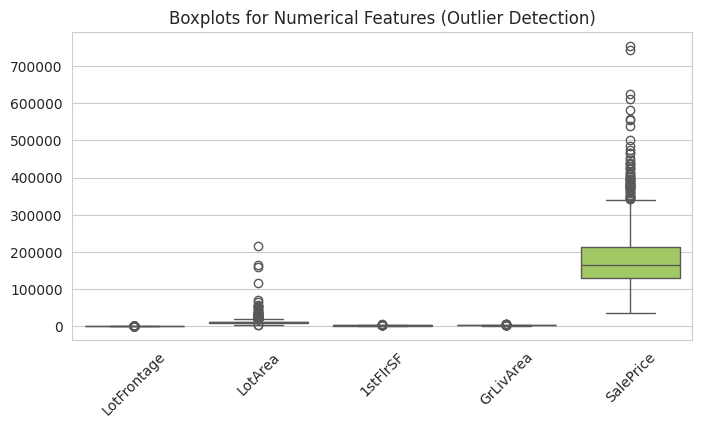

In [108]:
num_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

plt.figure(figsize=(8, 4))
sns.boxplot(data=df_train[num_features])
plt.title('Boxplots for Numerical Features (Outlier Detection)')
plt.xticks(rotation=45)
plt.show()

In [109]:
skewed_features = ['LotArea', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF']

for feature in skewed_features:
    df_train[feature] = np.log1p(df_train[feature])
    df_test[feature] = np.log1p(df_test[feature])

df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

In [110]:
x = df_train.drop(columns=['Id', 'SalePrice'])
y = df_train['SalePrice']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2025)

In [111]:
categorical_cols = x_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor_standard = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

preprocessor_minmax = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

### **[05] Build & Evaluate Models Using Pipeline**

In [112]:
models = [
    ('Dummy', DummyRegressor()),
    ('Linear', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('Poly', Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('linear', LinearRegression())
    ])),
    ('DecisionTree', DecisionTreeRegressor(random_state=2025)),
    ('RandomForest', RandomForestRegressor(random_state=2025)),
    ('XGBoost', XGBRegressor(random_state=2025, verbosity=0)),
    ('LightGBM', LGBMRegressor(random_state=2025)),
    ('SVR', SVR()),
    ('KNN', KNeighborsRegressor()),
    ('NeuralNet', MLPRegressor(max_iter=500, random_state=2025))
]

In [113]:
def evaluate_model(model, preprocessor, X_train, y_train, X_val, y_val):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)

    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)

    return mae, rmse, r2

In [114]:
results = []

for name, model in models:
    for preprocessor_name, preprocessor in [
        ('StandardScaler', preprocessor_standard),
        ('MinMaxScaler', preprocessor_minmax)
    ]:
        mae, rmse, r2 = evaluate_model(model, preprocessor, x_train, y_train, x_val, y_val)

        results.append({
            'Model': name,
            'Scaler': preprocessor_name,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2
        })

        print(f"Model: {name:<12} | Scaler: {preprocessor_name:<15} | MAE: {mae:.4f} | RMSE: {rmse:.4f} | R2: {r2:.4f}")

Model: Dummy        | Scaler: StandardScaler  | MAE: 0.3020 | RMSE: 0.3982 | R2: -0.0006
Model: Dummy        | Scaler: MinMaxScaler    | MAE: 0.3020 | RMSE: 0.3982 | R2: -0.0006
Model: Linear       | Scaler: StandardScaler  | MAE: 0.0938 | RMSE: 0.1850 | R2: 0.7841
Model: Linear       | Scaler: MinMaxScaler    | MAE: 0.0938 | RMSE: 0.1850 | R2: 0.7841
Model: Ridge        | Scaler: StandardScaler  | MAE: 0.0907 | RMSE: 0.1761 | R2: 0.8042
Model: Ridge        | Scaler: MinMaxScaler    | MAE: 0.0909 | RMSE: 0.1762 | R2: 0.8040
Model: Lasso        | Scaler: StandardScaler  | MAE: 0.3020 | RMSE: 0.3982 | R2: -0.0006
Model: Lasso        | Scaler: MinMaxScaler    | MAE: 0.3020 | RMSE: 0.3982 | R2: -0.0006
Model: Poly         | Scaler: StandardScaler  | MAE: 0.1157 | RMSE: 0.1646 | R2: 0.8291
Model: Poly         | Scaler: MinMaxScaler    | MAE: 0.1218 | RMSE: 0.1888 | R2: 0.7749
Model: DecisionTree | Scaler: StandardScaler  | MAE: 0.1480 | RMSE: 0.2026 | R2: 0.7409
Model: DecisionTree | Scaler

### **[6] Improving Models with GridSearchCV**

**The best 3 models have been selected:**


1.   LightGBM (MinMaxScaler) ==> [MAE: 0.0880 | RMSE: 0.1429 | R2: 0.8711]
2.   XGBoost (StandardScaler) ==> [MAE: 0.0960 | RMSE: 0.1488 | R2: 0.8602]
3.   RandomForest (StandardScaler) ==> [MAE: 0.0956 | RMSE: 0.1539 | R2: 0.8505]

These models will be optimized by **GridSearchCV** to select the best ones.



In [115]:
param_grid_lgb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [5, 7],
    'model__num_leaves': [31, 63]
}

pipeline_lgb = Pipeline([
    ('preprocessor', preprocessor_minmax),
    ('model', LGBMRegressor(random_state=2025))
])

grid_lgb = GridSearchCV(
    pipeline_lgb,
    param_grid_lgb,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_lgb.fit(x_train, y_train)

print("Best transactions:", grid_lgb.best_params_)
print("Best RMSE on verification:", round(np.sqrt(-grid_lgb.best_score_), 4))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3205
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 186
[LightGBM] [Info] Start training from score 12.026044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

In [116]:
param_grid_xgb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [5, 7],
    'model__subsample': [0.8, 1.0]
}

pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor_standard),
    ('model', XGBRegressor(random_state=2025, verbosity=0))
])

grid_xgb = GridSearchCV(
    pipeline_xgb,
    param_grid_xgb,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(x_train, y_train)

print("Best transactions:", grid_xgb.best_params_)
print("Best RMSE on verification:", round(np.sqrt(-grid_xgb.best_score_), 4))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best transactions: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__subsample': 0.8}
Best RMSE on verification: 0.1315


In [117]:
param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor_standard),
    ('model', RandomForestRegressor(random_state=2025))
])

grid_rf = GridSearchCV(
    pipeline_rf,
    param_grid_rf,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(x_train, y_train)

print("Best transactions:", grid_rf.best_params_)
print("Best RMSE on verification:", round(np.sqrt(-grid_rf.best_score_), 4))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best transactions: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best RMSE on verification: 0.1424


### **[7] Prediction on test file "df_test"**

*   The **"XGBoost"** model was selected as the best model based on previous optimization results.
*   The selected model will be used to predict unit prices based on the data in the **test file**.
*   The results will be printed in an Excel file titled **"Submission"**.

In [124]:
test_ids = df_test['Id']

x_test = df_test.drop(columns=['Id'])

y_test_pred_log = grid_xgb.predict(x_test)

y_test_pred = np.expm1(y_test_pred_log)

submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': y_test_pred.round(2)
})

submission.to_csv('submission.csv', index=False)

print("The submission.csv file was created successfully.")
print(submission.head())

The submission.csv file was created successfully.
     Id      SalePrice
0  1461  128137.757812
1  1462  156616.250000
2  1463  185175.296875
3  1464  186597.406250
4  1465  179302.843750


In [125]:
submission.to_excel('submission.xlsx', index=False)

files.download('submission.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **[8] Building a Streamlit Model**

In [121]:
joblib.dump(grid_xgb, 'house_price_model.pkl')
print("The model has been saved.")

model = joblib.load('house_price_model.pkl')

def predict_price(total_sqft, bedrooms, bathrooms, garage_cars, overall_qual, year_built, neighborhood):
    input_data = pd.DataFrame({
        'MSSubClass': [60],
        'MSZoning': ['RL'],
        'LotFrontage': [80],
        'LotArea': [total_sqft * 2],
        'Street': ['Pave'],
        'Alley': ['None'],
        'LotShape': ['Reg'],
        'LandContour': ['Lvl'],
        'Utilities': ['AllPub'],
        'LotConfig': ['Inside'],
        'LandSlope': ['Gtl'],
        'Neighborhood': [neighborhood],
        'Condition1': ['Norm'],
        'Condition2': ['Norm'],
        'BldgType': ['1Fam'],
        'HouseStyle': ['2Story'],
        'OverallQual': [overall_qual],
        'OverallCond': [5],
        'YearBuilt': [year_built],
        'YearRemodAdd': [year_built],
        'RoofStyle': ['Gable'],
        'RoofMatl': ['CompShg'],
        'Exterior1st': ['VinylSd'],
        'Exterior2nd': ['VinylSd'],
        'MasVnrType': ['None'],
        'MasVnrArea': [0],
        'ExterQual': ['TA'],
        'ExterCond': ['TA'],
        'Foundation': ['PConc'],
        'BsmtQual': ['TA'],
        'BsmtCond': ['TA'],
        'BsmtExposure': ['No'],
        'BsmtFinType1': ['GLQ'],
        'BsmtFinSF1': [total_sqft * 0.3],
        'BsmtFinType2': ['Unf'],
        'BsmtFinSF2': [0],
        'BsmtUnfSF': [total_sqft * 0.2],
        'TotalBsmtSF': [total_sqft * 0.5],
        'Heating': ['GasA'],
        'HeatingQC': ['Ex'],
        'CentralAir': ['Y'],
        'Electrical': ['SBrkr'],
        '1stFlrSF': [total_sqft * 0.6],
        '2ndFlrSF': [total_sqft * 0.4],
        'LowQualFinSF': [0],
        'GrLivArea': [total_sqft],
        'BsmtFullBath': [1],
        'BsmtHalfBath': [0],
        'FullBath': [bathrooms],
        'HalfBath': [1 if bathrooms >= 2 else 0],
        'BedroomAbvGr': [bedrooms],
        'KitchenAbvGr': [1],
        'KitchenQual': ['TA'],
        'TotRmsAbvGrd': [bedrooms + bathrooms],
        'Functional': ['Typ'],
        'Fireplaces': [1],
        'FireplaceQu': ['TA'],
        'GarageType': ['Attchd'],
        'GarageYrBlt': [year_built],
        'GarageFinish': ['RFn'],
        'GarageCars': [garage_cars],
        'GarageArea': [garage_cars * 300],
        'GarageQual': ['TA'],
        'GarageCond': ['TA'],
        'PavedDrive': ['Y'],
        'WoodDeckSF': [200],
        'OpenPorchSF': [50],
        'EnclosedPorch': [0],
        '3SsnPorch': [0],
        'ScreenPorch': [30],
        'PoolArea': [0],
        'PoolQC': ['None'],
        'Fence': ['None'],
        'MiscFeature': ['None'],
        'MiscVal': [0],
        'MoSold': [6],
        'YrSold': [2024],
        'SaleType': ['WD'],
        'SaleCondition': ['Normal']
    })

    try:
        prediction_log = model.predict(input_data)
        prediction = np.expm1(prediction_log)
        return f"${prediction[0]:,.2f}"
    except Exception as e:
        return f"Mistake: {e}"

interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Total area (square feet)"),
        gr.Slider(1, 10, step=1, label="Number of rooms"),
        gr.Slider(1, 6, step=1, label="Number of bathrooms"),
        gr.Slider(0, 4, step=1, label="Garage capacity (number of cars)"),
        gr.Slider(1, 10, step=1, label="Build Quality (1 to 10)"),
        gr.Number(1800, 2024, step=1, label="Year of construction"),
        gr.Dropdown(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'OldTown', 'BrkSide', 'NAmes'], label="The neighborhood")
    ],
    outputs=gr.Textbox(label="Expected price"),
    title="Home price forecast",
    description="Enter the home's specifications to get the estimated price."
)

interface.launch()

The model has been saved.
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1751d2e3db5ff482da.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
